In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import math

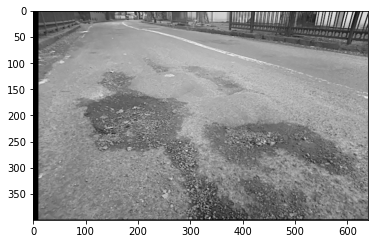

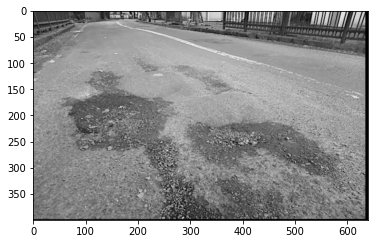

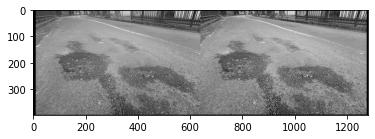

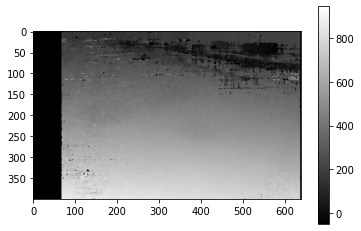

[-48 -48 -48 ... 781 -48 -48]


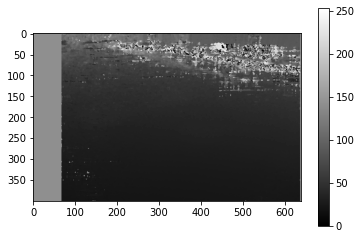

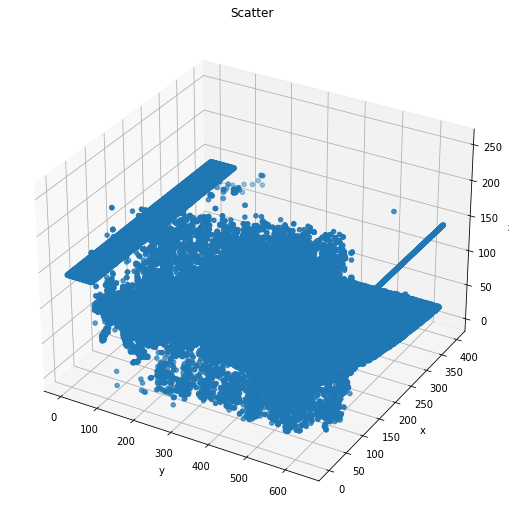

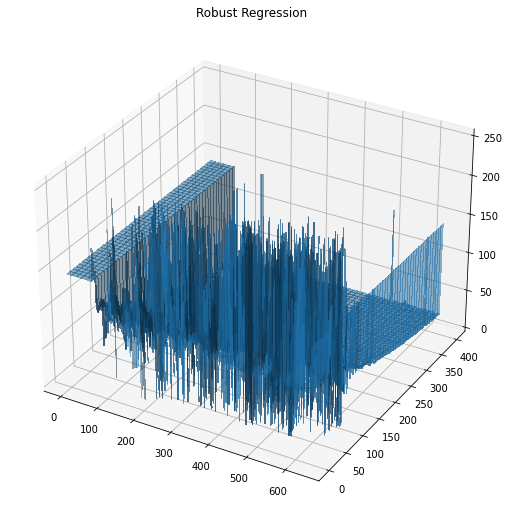

In [19]:
# max_disparity = 96

# H1 = np.array([[ 1.00047384e+00, -9.21142380e-04 , 1.05547668e+01],
#  [-8.98002546e-04 , 9.98893992e-01, -5.28518968e-01],
#  [ 7.41705741e-07, -3.17840628e-06 , 1.00062402e+00]])

# H2 = np.array([[ 1.00499352e+00 , 2.38408626e-03 ,-9.01707400e+00],
#  [ 2.31503605e-03 , 1.00108968e+00, -3.93138454e+00],
#  [ 7.67580780e-06 , 3.18005952e-06 , 9.93872447e-01]])

# right_image = cv2.imread('Right/RightImage20.png')
# left_image = cv2.imread('Left/LeftImage20.png')

# left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
# right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# left_img_rect = cv2.warpPerspective(left_image_gray, H1, left_image_gray.shape[::-1],
#                                     cv2.INTER_CUBIC +
#                                     cv2.WARP_FILL_OUTLIERS +
#                                     cv2.WARP_INVERSE_MAP)

# right_img_rect = cv2.warpPerspective(right_image_gray, H2, right_image_gray.shape[::-1],
#                                     cv2.INTER_CUBIC +
#                                     cv2.WARP_FILL_OUTLIERS +
#                                     cv2.WARP_INVERSE_MAP)
# lz_rectified = cv2.hconcat([left_img_rect, right_img_rect])

# # stereoProcessor = cv2.StereoSGBM_create(
# #             minDisparity=5,
# #             numDisparities=60,
# #             blockSize=5,
# #             P1=50, # 250
# #             P2=800, # 500
# #             disp12MaxDiff=-5,
# #             mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
# #         )

# win_size = -2
# min_disp =-2
# max_disp =0
# num_disp =70 # Needs to be divisible by 16
# stereoProcessor = cv2.StereoSGBM_create(
#     minDisparity=min_disp,
#     numDisparities=num_disp,
#     blockSize=3,
#     uniquenessRatio=5,
#     speckleWindowSize=10,
#     speckleRange=10,
#     disp12MaxDiff=10,
#     P1=10,
#     P2=700,
#     preFilterCap = 10,
#     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
# )

# # win_size = 2
# # min_disp =-2
# # max_disp = 5
# # num_disp =8  # Needs to be divisible by 16
# # stereoProcessor = cv2.StereoSGBM_create(
# #     minDisparity=min_disp,
# #     numDisparities=num_disp,
# #     blockSize=3,
# #     uniquenessRatio=5,
# #     speckleWindowSize=400,
# #     speckleRange=200,
# #     disp12MaxDiff=1,
# #     P1=100,
# #     P2=1000,
# #     preFilterCap = 20,
# #     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
# # )

# disparity = stereoProcessor.compute(left_img_rect, right_img_rect)
# # disparity = stereoProcessor.compute(right_img_rect, left_img_rect)

# # disparity = disparity[0:disparity.shape[0], max_disparity:dis.shape[1]]

# height = left_image.shape[0]
# width = left_image.shape[1]
# # print(disparity)

# plt.imshow(left_img_rect, "gray")
# plt.show()
# plt.imshow(right_img_rect,"gray")
# plt.show()
# plt.imshow(lz_rectified,"gray")
# plt.show()
# plt.imshow(disparity, "gray")
# plt.colorbar()
# plt.show()

# image_centre_h = disparity.shape[0]/2
# image_centre_w = disparity.shape[1]/2
# d = disparity.flatten()
# print(d)
# f = 882.5
# B = 7.5
# maxdisp = 95
# x3d=[]
# y3d=[]
# z3d=[]

# for y in range(height):# 0 - height is the y axis index
#     for x in range(width):# 0 - width is the x axis index

#         # if we have a valid non-zero disparity
#         if (disparity[y,x] > 0 or disparity[y,x] < 0):

#             # calculate corresponding 3D point [X, Y, Z]

#             Z = (f * B) / disparity[y,x]
#             Zacc = ((Z*255. )/maxdisp).astype(np.uint8)
# #             X = ((x - image_centre_w) * B) / disparity[y,x]
# #             Y = ((y - image_centre_h) * B) / disparity[y,x]

#             X = ((x - image_centre_w) * Zacc) / f
#             Y = ((y - image_centre_h) * Zacc) / f

#             # add to points
#             x3d.append(X)
#             y3d.append(Y)
# #             z3d.append(Zacc)
#             z3d.append(Zacc)
#         else:
#             z3d.append(0)

# #             if(left_img_rect.size > 0):
# #                 points.append([X,Y,Z,left_img_rect[y,x]])
# #             else:
# #             points.append([X,Y,Z])
# frame = np.reshape(z3d,(height,width))
# plt.imshow(frame, "gray")
# plt.colorbar()
# plt.show()

# w=[]
# h=[]
# d=[]
# for i in range(height):
#     for j in range(width):
#         w.append(i)
#         h.append(j)
# #         if(disparity1[i][j]<avg_dis):
# #             disparity1[i][j]= avg_dis
# #         d.append(disparity[i][j])
# fig = plt.figure(figsize =(21, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('y')
# ax.set_ylabel('x')
# ax.set_zlabel('z')
# ax.scatter(h,w , z3d)
# plt.show()

# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
# ax.set_title('Robust Regression')
# w1 =np.reshape(w,(height,width))
# h1 =np.reshape(h,(height,width))
# d1 =np.reshape(z3d,(height,width))
# # ax.scatter(xv,yv ,zv)
# # ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# ax.plot_surface(h1,w1 ,d1,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
# #zp = fun(cfs , np.array(x3d), np.array(y3d))
# # ax.scatter3D(x3d, y3d, z3d)
# plt.show()


[[75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


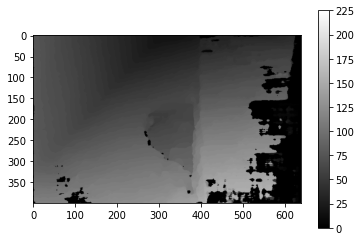

75.15315643487878


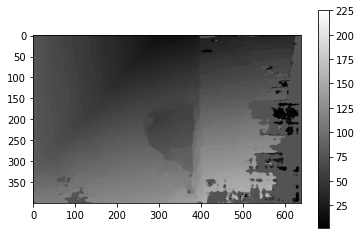

In [15]:
# disparity = np.load('dispimage_5.npy')
disparity = np.load('image_1.npy')
# disparit = cv2.imread('DISPARITYimage20.png')
# disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
print(disparity)
disparity3d = np.copy(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
width1 = disparity.shape[1]
height1 = disparity.shape[0]
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_dis= sum_dis + disparity[i][j]
            disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
print(avg_dis)
d1=[]
for i in range(height1):
    for j in range(width1):
        d1.append(disparity[i][j])

for i in range(disparity3d.shape[0]):
    for j in range(disparity3d.shape[1]):
        if(disparity3d[i][j] == 0):
            disparity3d[i][j] = avg_dis
plt.imshow(disparity3d, "gray")
plt.colorbar()
plt.show()

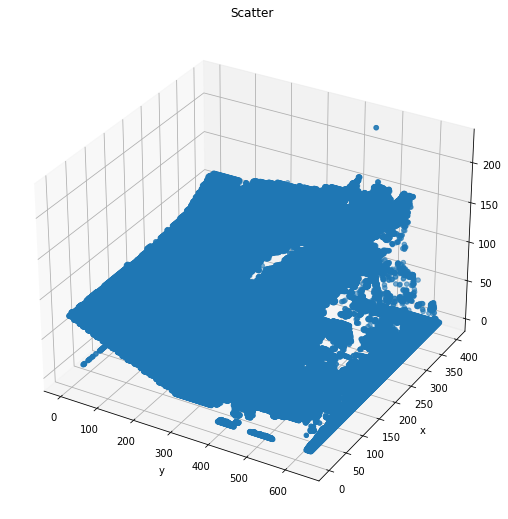

[ 8.53173187e-03  3.23428268e-01  3.73204114e-02 -1.69691810e-04
  1.02089589e-04  3.51176977e-05]


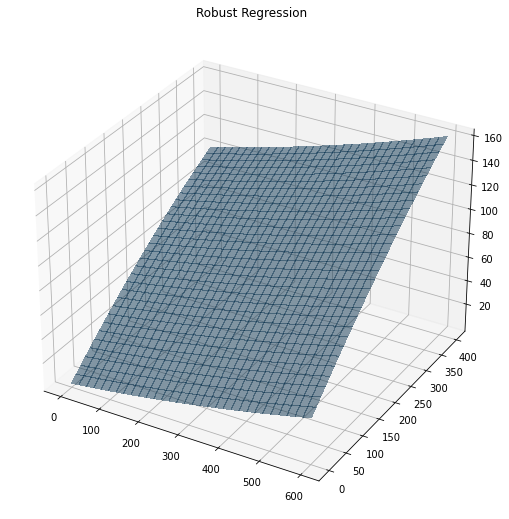

In [16]:
disparity1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity1[i][j] == disparity3d[i][j]
w=[]
h=[]
d=[]
for i in range(height1):
    for j in range(width1):
        w.append(i)
        h.append(j)
        if(disparity1[i][j]<avg_dis):
            disparity1[i][j]= avg_dis
        d.append(disparity[i][j])
# print(avg_dis)
fig = plt.figure(figsize =(21, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.scatter(h,w , d)
plt.show()

def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

x1 = np.linspace(0, 400, 32)

y1 = np.linspace(0, 600, 32)

xv, yv = np.meshgrid(x1, y1)
cfs = res_robust.x
print(cfs)
zv =fun_z(cfs, xv, yv)
z1 =zv.flatten()
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
# ax.scatter(h,w,d)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

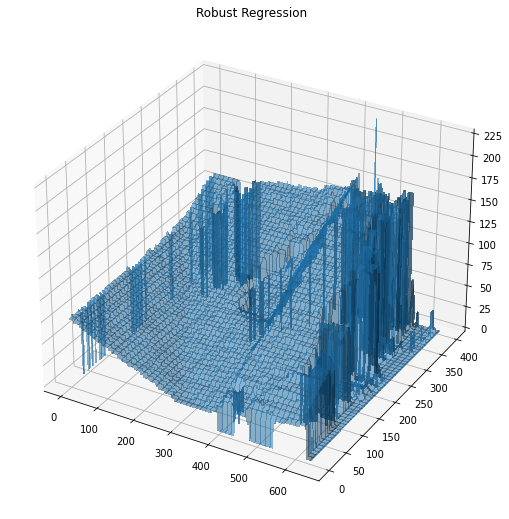

-4.946427342650253


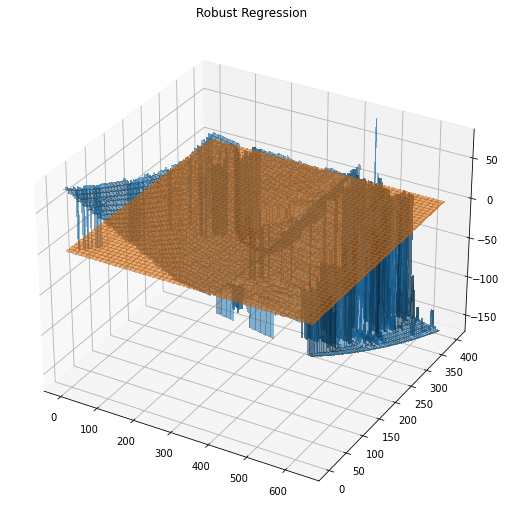

In [17]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
w1 =np.reshape(w,(height1,width1))
h1 =np.reshape(h,(height1,width1))
# ax.scatter(xv,yv ,zv)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

zv =fun_z(cfs, w1, h1)
diff =np.array(disparity) - np.array(zv)
print(diff[300][250])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

In [18]:
sumc = 0
noc = 0
for i in range(height1):
    for j in range(width1):
        if(disparity[i][j] !=0):
            sumc= sumc + diff[i][j]
#         sumb= sumb + img_mask[i][j]
            noc = noc +1
avgc = sumc / noc
print(avgc)
print(int(avgc))

0.8495462167778968
0


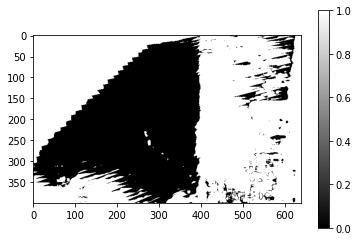

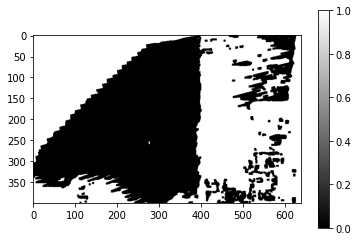

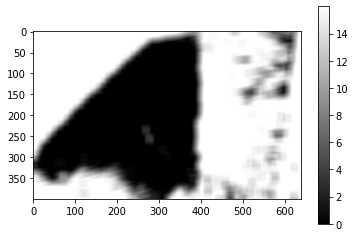

15.999999642372131
9.396818539964734
15.999999642372138
0.5873011718749998
0


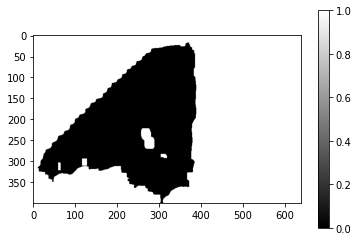

In [19]:
img_black1 = np.ones((height1,width1))
for i in range(height1):
    for j in range(width1):
#         if(diff[i][j] < -2 and disparity[i][j] >= 20):
        if(diff[i][j] < int(avgc) and disparity[i][j] >= 20):
            img_black1[i][j] = 0
plt.imshow(img_black1 , 'gray')
plt.colorbar()
plt.show()

dst2 = cv2.erode(img_black1, kernel2, iterations=1)
plt.imshow(dst2, 'gray')
plt.colorbar()
plt.show()

mask_inv1 = cv2.bitwise_not(img_black1)
kernel1 = np.ones((20,20),np.float32)/25
# dst1 = cv2.filter2D(img_black1,-1,kernel1)
dst1 = cv2.filter2D(img_black1,-1,kernel1)
plt.imshow(dst1, 'gray')
plt.colorbar()
plt.show()

# plt.imshow(blur1 , 'gray')
# plt.colorbar()
# plt.show()

print(dst1[0][100])

# img_mask1 = np.ones((height1,width1))
# for i in range(1,height1-1):
#     for j in range(1,width1-1):
# #         sum = dst[i-1][j-1] + dst[i-1][j]+ dst[i-1][j+1] + dst[i][j-1] + dst[i][j]+ dst[i][j+1] + dst[i+1][j-1] + dst[i+1][j]+ dst[i+1][j+1]
# #         img_mask[i][j] = sum/9
#         sum12 = 0
#         no12 = 0
#         for y in range(i,i+10):
#             for x in range(j,j+10):
#                 if(i+10<=disparity3d.shape[0] and j+10 <= disparity3d.shape[1]):
#                     sum12 = sum12 + dst1[y][x]
#                     no12 = no12+1
#         if(no12 >0):    
#             img_mask1[i][j] = sum12 / no12
# # plt.imshow(img_mask , 'gray')
# plt.colorbar()
# plt.show()
        
suma = 0
noa = 0
for i in range(height1):
    for j in range(width1):
        suma= suma + dst1[i][j]
#         sumb= sumb + img_mask[i][j]
        noa = noa +1
avga = suma / noa
print(avga)

# for i in range(height1):
#     for j in range(width1):
#         if(dst1[i][j] > avga):
#             dst1[i][j] = 255
#         else:
#             dst1[i][j] = 0
kernel2 = np.ones((5, 5), np.uint8)
# dst2 = cv2.erode(dst1, kernel2, iterations=1)
# plt.imshow(dst2, 'gray')
# plt.colorbar()
# plt.show()

dio = dst1.flatten()
# dio = img.flatten()
e = max(dio)
print(e)
print(avga/e)
print(int(avga/e))
if avga/e < e:
    s = avga/e
else:
    s = int(avga/e)
for i in range(height1):
    for j in range(width1):
        if(dst1[i][j] > s):
            dst1[i][j] = 1
        else:
            dst1[i][j] = 0
        
plt.imshow(dst1, 'gray')
plt.colorbar()
plt.show()

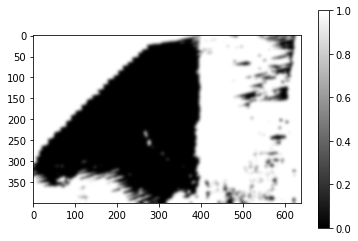

0.5873062637258808
1.0000000000000002
0.5873062637258807
0


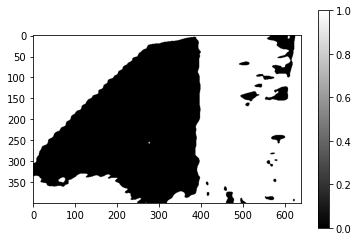

In [20]:
blur1 = cv2.GaussianBlur(img_black1,(21,21),0)
plt.imshow(blur1 , 'gray')
plt.colorbar()
plt.show()

suma1 = 0
noa1 = 0
for i in range(height1):
    for j in range(width1):
        suma1= suma1 + blur1[i][j]
#         sumb= sumb + img_mask[i][j]
        noa1 = noa1 +1
avga1 = suma1 / noa1
print(avga1)

# for i in range(height1):
#     for j in range(width1):
#         if(dst1[i][j] > avga):
#             dst1[i][j] = 255
#         else:
#             dst1[i][j] = 0
# kernel21 = np.ones((5, 5), np.uint8)
# dst2 = cv2.erode(dst1, kernel2, iterations=1)
# plt.imshow(dst2, 'gray')
# plt.colorbar()
# plt.show()

dio1 = blur1.flatten()
# dio = img.flatten()
e1 = max(dio1)
print(e1)
print(avga1/e1)
print(int(avga1/e1))
if avga1/e1 < e1:
    s = avga1/e1
else:
    s = int(avga1/e1)
for i in range(height1):
    for j in range(width1):
        if(blur1[i][j] > s):
            blur1[i][j] = 1
        else:
            blur1[i][j] = 0
        
plt.imshow(blur1, 'gray')
plt.colorbar()
plt.show()

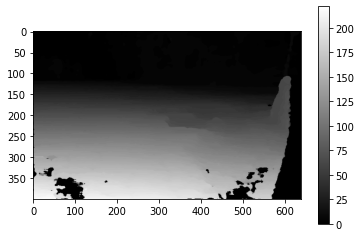

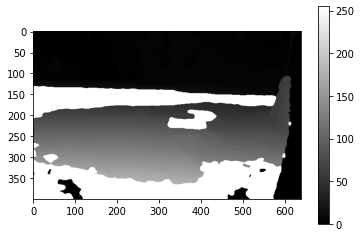

In [9]:
disparity_z = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_z[i][j] = disparity[i][j]
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()
for i in range(height1):
    for j in range(width1):
        if(blur1[i][j] == 0):
            disparity_z[i][j] = 255
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 

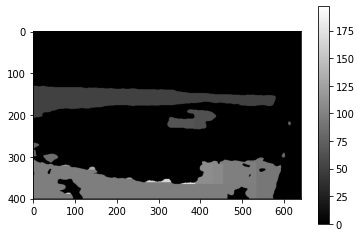

In [10]:
disparity_pl = np.zeros((height1+1,width1+1))
child=[]
mom =[]
a=50
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_z[i][j] == 255):
            if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]==0 ):
                a = a+1
                print(a)
                disparity_pl[i][j]=a
            else:
                if(disparity_pl[i-1][j]!=0 or disparity_pl[i][j-1]!=0):
                    if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]!=0):
                        disparity_pl[i][j]=disparity_pl[i][j-1]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]==0):
                        disparity_pl[i][j]=disparity_pl[i-1][j]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]!=0):
                        c = min(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        mo =c
                        disparity_pl[i][j] = c
                        chil = max(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        if mo in child:
                            mom.append(mom[child.index(mo)])
                        else:
                            mom.append(mo)
                        child.append(chil)
#                         print(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]), " is a child of ",c)
#                         if max(disparity_pl[i-1][j] , disparity_pl[i][j-1]) not in child:
#                             child.append(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]))
#                         if c not in mom:
#                             mom.append(c)
print(mom)
print(child)
# for i in mom:
#     if i in child:
#         mom.remove(i)
# print(mom)
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
# # plt.imshow(disparity_pl , 'gray')            
# # plt.colorbar()
# # plt.show()
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_pl[i][j] in child):
            disparity_pl[i][j] = mom[child.index(disparity_pl[i][j])]
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(disparity_pl , 'gray')            
plt.colorbar()
plt.show()
# # print(disparity_pl)
# # print(child)
# # print(mom)
# count = 0
# for i in range(1,height1):
#     for j in range(1,width1):
#         if(disparity_pl[i][j] != 0 or disparity_pl[i][j] != 1):
#             count= count +1
# print(count)

In [11]:
single = [] 
[single.append(x) for x in mom if x not in single]
print(single)

[51.0, 62.0, 65.0, 75.0, 79.0, 80.0, 81.0, 84.0, 92.0, 97.0, 98.0, 101.0, 106.0, 109.0, 121.0, 125.0, 131.0, 160.0, 165.0, 168.0, 182.0, 184.0, 197.0]


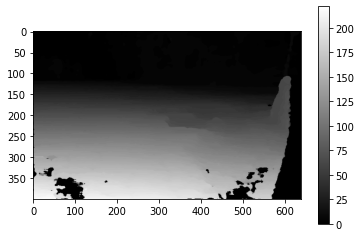

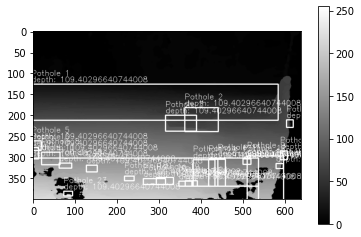

In [12]:
disparity_rect = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect[i][j] = disparity[i][j]
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
top=[]
bottom=[]
left =[]
right =[]
sum_calc = 0
d_no = 0
for x in range(len(single)):
    proxy =[]
    proxy2=[]
    for i in range(0,height1):
        for j in range(0,width1):
            if(disparity_pl[i][j] == single[x]):
                proxy.append(i)
                break
    top.append(proxy[0])
    bottom.append(proxy[len(proxy)-1])
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                sum_calc = sum_calc + disparity[i][j]
                d_no = d_no+1
    avg_disp = sum_calc / d_no 
    #Assumption: I encounter the particular label only in one pothole 
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                proxy2.append(j)
                break
    left.append(proxy2[0])
    right.append(proxy2[len(proxy2)-1])
#     for i in range(height1-1, -1):
#         for j in range(0,width1):
#             if(disparity_pl[i][j] == single[x]):
#                 bottom.append[j]
#                 break 
a =1
for x in range(len(single)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]+5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_disp)
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
    disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    a=a+1
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
# cv2.imshow('Contours', disparity_z)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [13]:
single1 = []
remove = []
remove=[]
removel=[]
remover=[]
removet=[]
removeb=[]
[single1.append(x) for x in single]
print(single1)
print(left)
print(right)
print(top)
print(bottom)
avg =[]
avg_pot=[]
for x in range(len(single)):
#     start_point = (left[x]-5 , top[x]-5)
#     end_point = (right[x]+5 , bottom[x]+5)
#     start_point_txt = (left[x]-5 , top[x]-25)
#     start_point_txt1 = (left[x]-5 , top[x]-10)
#     # Blue color in BGR
#     color = (255, 0, 0)

#     # Line thickness of 2 px
#     thickness = 2
#     txt = 'Pothole '+str(a)
#     txt1 = 'depth: '+str(avg_disp)
#     # Using cv2.rectangle() method
#     # Draw a rectangle with blue line borders of thickness of 2 px
#     disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
#     disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     a=a+1
    sum_final =0
    dis_final_no =0
    sum_final_pot =0
    dis_final_no_pot =0
    for s in range(top[x]-20, bottom[x]+20):
        for r in range(left[x]-20 , right[x]+20):
            if(s < 0 or s >= disparity.shape[0] or r<0 or r>=disparity.shape[1]):
                if single[x] not in remove:
                    remove.append(single[x])
                    removel.append(left[x])
                    remover.append(right[x])
                    removet.append(top[x])
                    removeb.append(bottom[x])
#                 print(single[x])
            else:
                if(disparity_pl[s][r] ==0 and disparity[s][r] != 0):
                    sum_final = sum_final + disparity[s][r]
                    dis_final_no = dis_final_no + 1
                else:
                    sum_final_pot = sum_final_pot + disparity[s][r]
                    dis_final_no_pot = dis_final_no_pot + 1
    avg_dis_final = sum_final / dis_final_no
    avg.append(avg_dis_final)
    avg_dis_final_pot = sum_final_pot / dis_final_no_pot
    avg_pot.append(avg_dis_final_pot)
print(remove)
print(avg)
print(avg_pot)
diff_pot =[]
for x in range(len(avg)):
    difflia = avg[x]-avg_pot[x]
    diff_pot.append(difflia)
print()
print(diff_pot)
for i in range(len(remove)):
    single1.remove(remove[i])
    left.remove(removel[i])
    right.remove(remover[i])
    top.remove(removet[i])
    bottom.remove(removeb[i])
print(single1)

[51.0, 62.0, 65.0, 75.0, 79.0, 80.0, 81.0, 84.0, 92.0, 97.0, 98.0, 101.0, 106.0, 109.0, 121.0, 125.0, 131.0, 160.0, 165.0, 168.0, 182.0, 184.0, 197.0]
[1, 367, 321, 610, 1, 1, 595, 25, 516, 1, 446, 506, 424, 387, 67, 585, 132, 223, 299, 268, 368, 353, 78]
[580, 437, 385, 616, 14, 8, 602, 59, 593, 533, 533, 515, 454, 429, 87, 592, 148, 236, 330, 311, 387, 374, 89]
[131, 187, 205, 216, 266, 282, 290, 293, 302, 307, 307, 309, 310, 311, 319, 320, 324, 350, 353, 356, 361, 362, 386]
[207, 234, 233, 224, 279, 299, 301, 313, 399, 399, 364, 312, 364, 364, 321, 322, 330, 351, 360, 360, 364, 364, 387]
[51.0, 79.0, 80.0, 92.0, 97.0, 197.0]
[40.76752197937407, 66.76006339144216, 76.82654173022445, 68.8056338028169, 118.8552036199095, 131.990492653414, 105.01587301587301, 136.581336238199, 110.997458703939, 144.06204422720643, 115.3319587628866, 115.91456834532374, 120.05599472990777, 138.52741131632953, 147.91236306729263, 117.73764906303236, 152.21355498721226, 167.12325390304025, 167.283369803063

[367, 321, 610, 595, 25, 446, 506, 424, 387, 67, 585, 132, 223, 299, 268, 368, 353]


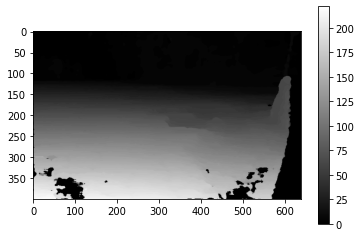

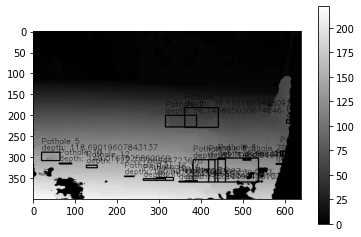

In [14]:
print(left)
disparity_rect_1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect_1[i][j] = disparity[i][j]
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

a =1
for x in range(len(single1)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (0, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_pot[x])
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect_1 = cv2.rectangle(disparity_rect_1, start_point, end_point, color, thickness)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    a=a+1
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()